xl         xu         d          x1         x2         f(x1)      f(x2)      error     
0.0000     4.0000     2.4721     2.4721     1.5279     0.6300     1.7647     -0.9443   
0.0000     2.4721     1.5279     1.5279     0.9443     1.7647     1.5310     -0.5836   
0.9443     2.4721     0.9443     1.8885     1.5279     1.5432     1.7647     -0.3607   
0.9443     1.8885     0.5836     1.5279     1.3050     1.7647     1.7595     -0.2229   
1.3050     1.8885     0.3607     1.6656     1.5279     1.7136     1.7647     -0.1378   
1.3050     1.6656     0.2229     1.5279     1.4427     1.7647     1.7755     -0.0851   
1.3050     1.5279     0.1378     1.4427     1.3901     1.7755     1.7742     -0.0526   
1.3901     1.5279     0.0851     1.4752     1.4427     1.7732     1.7755     -0.0325   
1.3901     1.4752     0.0526     1.4427     1.4226     1.7755     1.7757     -0.0201   
1.3901     1.4427     0.0325     1.4226     1.4102     1.7757     1.7754     -0.0124   
1.4102     1.4427     0.0201    

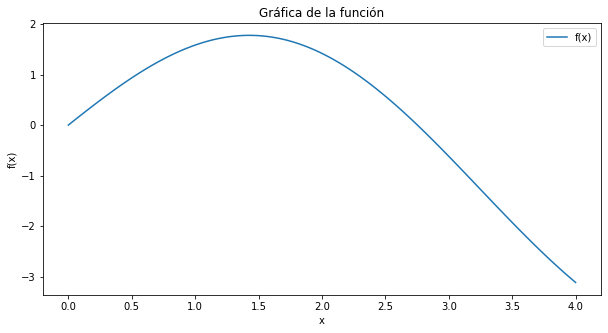

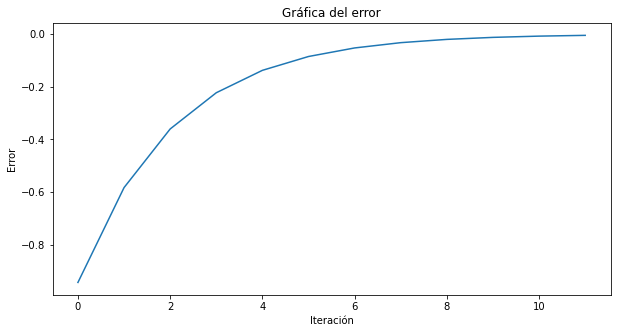

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

def funcion(x):
    return 2 * math.sin(x) - (x**2 / 10)

def busqueda_seccion_dorada(funcion, xl, xu, tol=0.01):
    e = ((1 + math.sqrt(5)) / 2) -1 
    d = e * (xu - xl)
    
    xl_vals, xu_vals, d_vals, x1_vals, x2_vals, fx1_vals, fx2_vals, error_vals = [], [], [], [], [], [], [], []
    
    while abs(d) > tol:
        x1 = xl + d
        x2 = xu - d
        
        fx1 = funcion(x1)
        fx2 = funcion(x2)
        error = x2 - x1
        
        xl_vals.append(xl)
        xu_vals.append(xu)
        d_vals.append(d)
        x1_vals.append(x1)
        x2_vals.append(x2)
        fx1_vals.append(fx1)
        fx2_vals.append(fx2)
        error_vals.append(error)
        
        if fx2 > fx1:
            xl = xl
            xu = x1
        else:
            xu = xu
            xl = x2
        
        d = e * (xu - xl) 
    
    resultados = {
        'xl': xl_vals,
        'xu': xu_vals,
        'd': d_vals,
        'x1': x1_vals,
        'x2': x2_vals,
        'fx1': fx1_vals,
        'fx2': fx2_vals,
        'error': error_vals
    }
    
    return resultados

# Valores iniciales
xl = 0
xu = 4

resultados = busqueda_seccion_dorada(funcion, xl, xu)

print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    'xl', 'xu', 'd', 'x1', 'x2', 'f(x1)', 'f(x2)', 'error'))
for i in range(len(resultados['xl'])):
    print("{:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        resultados['xl'][i], resultados['xu'][i], resultados['d'][i], resultados['x1'][i], 
        resultados['x2'][i], resultados['fx1'][i], resultados['fx2'][i], resultados['error'][i]))

# Grafica de la función
x_vals = np.linspace(0, 4, 100)
y_vals = [funcion(x) for x in x_vals]

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función')
plt.legend()
plt.show()

# Grafica del error
plt.figure(figsize=(10, 5))
plt.plot(resultados['error'])
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Gráfica del error')
plt.show()